[![author](https://img.shields.io/badge/author-ghermsen-red.svg)](https://www.linkedin.com/in/gabrielhermsen/)

# Exploratory Data Analysis São Paulo's Policy Murder Reports

According to the [WHO, World Health Organization](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/estimates-of-rates-of-homicides-per-100-000-population) (date of view 03.18.2021), Brazil has a homicide rate of 32.59 per 100 thousand inhabitants, a rate five times higher than the global average (6 for every 100 thousand inhabitants), making the country on the 9th position in this sad statistic.

Brazil is a vast country, with more than 200 million inhabitants and divided by 27 federative units, with extreme inequality. An excellent example of these inequalities is the homicide rate of these states that the [Atlas of Violence](https://www.ipea.gov.br/atlasviolencia/arquivos/artigos/3519-atlasdaviolencia2020completo.pdf) (p.18) reported. This report shows us that in 2018 the state of Roraima had the highest homicide rate in the country, 71.8 homicides per 100 thousand inhabitants, whereas the state of São Paulo had the lowest homicide rate in the country with only 8.2 homicides per 100 thousand inhabitants.

In this work, an Exploratory Analysis of the police reports referring to homicides in the state of São Paulo will be carried out between the years 2018 and 2020.

<br><center><img alt="" width="100%" src="img/marilia-castelli-sbXNOlW1Tgk-unsplash.jpg"></center>
Photo by [Marília Castelli](https://unsplash.com/@liacastelli?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText) on [Unsplash](https://unsplash.com/s/photos/sao-paulo?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText)

## Imports

Below there are all the libraries used in this project.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pywaffle import Waffle

%matplotlib inline

## Helper Functions

In [2]:
# function make_text

def make_text(rows, # number of rows
              cols, # number of cols
              texts, # number of texts to display
              result, # featured text
              label = '', # detailed text
              font1_size = 80, # featured text font size
              font2_size = 20, # detailed text font size
              ha = 'center', # horizontal alignment
              va = 'center', # vertical alignment
              font1_color = '#FF691E', # featured text font color
              font2_color = '#5F6A6A', # detailed text font color
              font1_weight = 'bold', # featured text font weight
              font2_weight = 'normal', # detailed text font weight
              sup_title = '', # suptitle
              font_suptitle = 30, # font size suptitle
              title1 = '', # title left figure
              title2 = '', # title right figure
              loc = 'center', # loc
              font_title = 20, # font size of titles
              a = 0.5, # percentage for va featured text
              b = 0.5, # percentage for ha featured text
              c = 0.5, # percentage for va detailed text
              d = 0.1, # percentage for ha detailed text
              figsize = (6, 2) # figure size
             ): 
    
    # axes coordenates

    left, width = 0.25, 0.5
    bottom, height = 0.25, 0.5
    right = left + width
    top = bottom + height
    
    # text fonts
    
    fonttitle = {'family': 'sans-serif', 'weight': 'normal', 'size': font_title, 'horizontalalignment': loc}
    font1 = {'family': 'sans-serif', 'color': font1_color, 'weight': font1_weight, 'size': font1_size}
    font2 = {'family': 'sans-serif', 'color':font2_color, 'weight': font2_weight, 'size': font2_size} 
        
    # creating texts
    
    if texts > 1:
        
        # creating the figure for texts
        
        fig, ax = plt.subplots(rows, cols, figsize = figsize)
        
        ax = ax.ravel()
        
        for i in range(len(result)):
            
            if i == 0:
                ax[i].set_title(title1, fontdict = fonttitle)
            elif i == 1:
                ax[i].set_title(title2, fontdict = fonttitle)
                           
            ax[i].set(xlim = (0, 1), ylim = (0, 1))
                
            ax[i].text(a * (left + right), b * (bottom + top), result[i],
                    ha = ha,
                    va = va,
                    fontdict = font1,
                    transform = ax[i].transAxes)
            if label != '':
                ax[i].text(c * (left + right), d * (bottom + top), label[i],
                        ha = ha,
                        va = va,
                        fontdict = font2,
                        transform = ax[i].transAxes)
   
            ax[i].axis('off')
            
        plt.suptitle(sup_title, fontsize = font_suptitle)
                      
    else:
        
        fig, ax = plt.subplots(rows, cols, figsize = figsize)
        
        ax.set_title(title1, fontdict = fonttitle)
        
        ax.set(xlim = (0, 1), ylim = (0, 1))
                
        ax.text(a * (left + right), b * (bottom + top), result,
                ha = ha,
                va = va,
                fontdict = font1,
                transform = ax.transAxes)
        ax.text(c * (left + right), d * (bottom + top), label,
                ha = ha,
                va = va,
                fontdict = font2,
                transform = ax.transAxes)
                
        ax.axis('off')
        
    plt.suptitle(sup_title, fontsize = font_suptitle)
      
# function make_chart_and_text

def make_chart_and_text(aux, #aux dataframe for chart
                        label,#label for chart 
                        aux_column,#dataframe col 
                        result,#featured text
                        label1,#detailed text
                        min_max = 'min', # values on top of bar, min for min bar, max for max bar
                        min_max_all = 'min',# bar color, min for min value, max for max value and '' for all values.
                        font1_size=80,#featured text font size
                        font2_size=20,#detailed text font size
                        font1_color='#FF691E',#featured text font color
                        font2_color='#5F6A6A',#detailed text font color
                        font1_weight='bold',#featured text font weight
                        font2_weight='normal',#detailed text font weight
                        a = 0.5,#percentage for va featured text
                        b = 0.5,#percentage for ha featured text
                        c = 0.5,#percentage for va detailed text
                        d = 0.1,#percentage for ha detailed text
                        figsize = (10,4)#figsize
                       ):
    
    # axes coordenates

    left, width = 0.25, 0.5
    bottom, height = 0.25, 0.5
    right = left + width
    top = bottom + height
    
    # text fonts
    
    font1 = {'family': 'sans-serif', 'color': font1_color, 'weight': font1_weight, 'size': font1_size}
    font2 = {'family': 'sans-serif', 'color':font2_color, 'weight': font2_weight, 'size': font2_size}

    # font bar label and bar conditional
    
    value_font = {'family': 'sans', 'color':'#5F6A6A','weight': 'bold','size': 10}
    color = []
    for i in aux[aux_column]:
        if min_max_all == 'min':
            if i == aux[aux_column].min():
                color.append('#FF691E')
            else:
                color.append('#99A3A4')
        elif min_max_all == 'max':
            if i == aux[aux_column].max():
                color.append('#FF691E')
            else:
                color.append('#99A3A4')
            
            
    # creating the figure for chart and image       
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figsize)
        
    # creating chart 
        
    ax1.bar(aux.index, aux[aux_column], color = color)
        
    # despine 
            
    ax1.grid(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
        
    # setting axes labels chart 
        
    ax1.set_xticks(aux.index)
    ax1.set_yticks([])
        
    # result on top of each bar chart
    
    if min_max == 'max':
        for i, v in enumerate(label):
            if v == label.max():
                ax1.text(aux.index[i], v + 100, str(v), horizontalalignment = 'center',
                verticalalignment = 'bottom',
                fontdict = value_font)
    elif min_max == 'min':
        for i, v in enumerate(label):
            if v == label.min():
                ax1.text(aux.index[i], v + 100, str(v), horizontalalignment = 'center',
                verticalalignment = 'bottom',
                fontdict = value_font)
    else:
        for i, v in enumerate(label):
            if v == aux.values[i]:
                ax1.text(aux.index[i], v + 100, str(v), horizontalalignment = 'center',
                verticalalignment = 'bottom',
                fontdict = value_font)
        
        
    # creating the text chart
        
    ax2.set(xlim = (0, 1), ylim = (0, 1))
    ax2.text(a * (left + right), b * (bottom + top), result,
            horizontalalignment = 'center',
            verticalalignment = 'center',
            fontdict = font1,
            transform = ax2.transAxes)
    ax2.text(c * (left + right), d * (bottom + top), label1,
            horizontalalignment = 'center',
            verticalalignment = 'center',
            fontdict = font2,
            transform = ax2.transAxes)
        
    # cleaning the image
        
    ax2.axis('off')
    plt.show()

## Obtaining the Data

All data used in this project was obtained from the [São Paulo's State Secretariat for Public Security](http://www.ssp.sp.gov.br/transparenciassp/).

For this Exploratory Data Analysis, the following files was downloaded and merged in one single file:

* Downloaded Files
    * Category - Homícidio doloso **(murder, willful homicide)**
    * Period - Every month between Jan 2018 and Dec 2020

* Repository File
    * Path - https://github.com/ghermsen/sao_paulo_murder_eda
    * File -
    
**Note: With the intent of preserving the victims' identities, I already processed the data. For this reason, I will conduct only a small data processing in this analysis.**

In [3]:
# importing the data

df_raw = pd.read_csv('db/dadosbo.csv', low_memory = False)

## Understanding the Dataset

Understanding the data is a fundamental step in any data science project. It will show us the variables available in our dataset and how these variables are structured. This step helps us understand the type of problem and how we will solve it.

### Variables' Dictionary:

* `date` - the date that the murder occurred
* `time` - the time that the murder occurred
* `period` - the period of the day that the murder occurred
* `city` - the city where the murder occurred
* `region` - the administrative region that the city belongs to
* `police_station` - the police station that registered the murder
* `gender` - victim's gender
* `age` - victim's age
* `ethnicity` - victim's ethnicity (classification used by [IBGE](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html))

We can now check the first five entries in our dataset to better understand our data.

In [4]:
# checking the first entries

df_raw.head()

,date,time,period,city,region,police_station,gender,age,ethnicity
0,01/01/18,05:10:00,middle of the night,SUZANAPOLIS,Araçatuba,DEL.POL.SUZANOPOLIS,male,22,parda (multiracial)
1,01/01/18,09:30:00,in the morning,ARUJA,Grande São Paulo,DEL.POL.ARUJA,male,17,parda (multiracial)
2,01/01/18,09:30:00,in the morning,ARUJA,Grande São Paulo,DEL.POL.ARUJA,male,17,parda (multiracial)
3,01/01/18,21:40:00,at night,AGUDOS,Bauru,DEL.POL.AGUDOS,male,200,parda (multiracial)
4,01/01/18,05:00:00,middle of the night,TATUI,Sorocaba,DEL.POL.PLANTÃO TATUI,male,43,white


### Dataset Size and Type of Variables

Below, you can see the size of the dataset and the type of its variables.

In [5]:
# checking dataset's size and number of variables

print(f'Number of Entries:\t {df_raw.shape[0]}')
print(f'Number of Variables:\t {df_raw.shape[1]}')

# types of variables

df_raw.dtypes

Number of Entries:	 11793
Number of Variables:	 9


date              object
time              object
period            object
city              object
region            object
police_station    object
gender            object
age                int64
ethnicity         object
dtype: object

It can be observed that the `date` and `time` variables are `object`. As these variables represent
time, these variables passed for a process of merging and then transformed into `datetime64[ns]`. 

In [6]:
# changing type of date and time variables

df_raw.date = df_raw.date.map(str) + " " + df_raw.time
df_raw = df_raw.drop('time', axis = 1)
df_raw.date = pd.to_datetime(df_raw.date)
df_raw.dtypes

date              datetime64[ns]
period                    object
city                      object
region                    object
police_station            object
gender                    object
age                        int64
ethnicity                 object
dtype: object

### Cleaning the Dataset

Looking at the Variables’ Dictionary and the type of variables presented in the dataset, it is possible to see a variable not relevant for the analysis, which is `police_station`. For a cleaner and more objective analysis, I deleted this variable.

In [7]:
df_raw.drop('police_station', axis = 1, inplace = True)

### Missing Values

The quality of a dataset is directly related to the number of missing values. It is important to understand early on whether these null values are significant concerning the total number of entries to avoid future problems in our analysis.

In [8]:
# checking missing values

((df_raw.isnull()).sum() / df_raw.shape[0]).sort_values(ascending = False)

date         0.0
period       0.0
city         0.0
region       0.0
gender       0.0
age          0.0
ethnicity    0.0
dtype: float64

### Feature Engineering

In this project, I will create variables derived from existing variables to assist future analyses. The variables will be the following:

* `year` - the year that the murder occurred.
* `month` - the month that the murder occurred.
* `day` - the day that the murder occurred.
* `hour` - the hour that the murder occurred.
* `day_of_week` - the day of the week that the murder occurred.
* `weekend` -  if the day of the week is a weekend (Saturday or Sunday), the value is equal to 1. If it is not, the value is equal to 0.
* `age_group` - the age group that the victim belongs to.

After this process, the data frame is ready for analysis.

In [9]:
# feature engineering for year, month, day, hour, day_of_week and weekend variables

df_raw['year'] = df_raw.date.dt.year
df_raw['month'] = df_raw.date.dt.month
df_raw['day'] = df_raw.date.dt.day
df_raw['hour'] = df_raw.date.dt.hour
df_raw['day_of_week'] = df_raw.date.dt.day_name()
df_raw['weekend'] = 0
df_raw.loc[(df_raw.day_of_week == "Saturday") | (df_raw.day_of_week == "Sunday"), 'weekend'] = 1

# feature engineering for age_group variable

bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_raw['age_group'] = pd.cut(df_raw.age, bins, labels = labels, include_lowest = True, right = False)
df_raw['age_group'] = df_raw['age_group'].cat.add_categories('unknown').fillna('unknown')
df_raw.sample()

,date,period,city,region,gender,age,ethnicity,year,month,day,hour,day_of_week,weekend,age_group
6012,2019-06-28 06:33:00,in the morning,SANTOS,Santos,male,86,parda (multiracial),2019,6,28,6,Friday,0,70+


## Data Analysis

The data analysis will address territorial, social and temporal aspects:

- **Territorial**
    - São Paulo's State
        1. What is the total number of victims of murder in São Paulo's state during 2018, 2019, and 2020?
        2. What is the total change of victims of murder between the years analyzed?
    - Administrative Regions
        1. What is the distribution of the number of victims of murder among the different regions of São Paulo's state?
        2. What is the total change of victims of murder among the regions of São Paulo's state between the years analyzed?
- **Social**
    - Gender
        1. What is the leading gender of the victims?
        2. What is the percentual difference in the victims of murder between the years by gender?
    - Ethnicity
        1. What is the leading ethnic group of the victims?
        2. What is the percentual difference in the victims of murder between the years by ethnic group?
    - Age Group
        1. What is the leading age group of the victims?
        2. What is the percentual difference in the victims of murder between the years by age group?
    - Victims' Profile
        1. What are the main profiles of male and female victims?
- **Temporal**
    - What is the month with the most victims of murder?
    - What is the day with the most victims of murder?
    - Which period of the day has more victims of murder?
    - What is the hour of the day with the most victims of muder? Are there differences between the hours on weekdays and weekends?

In [10]:
df = df_raw.copy()

### Territorial Analysis

The state of São Paulo has a total size of 248,209 km², and if we compare the size of the state of São Paulo with a country, it would be slightly larger than the United Kingdom, which has 242,495 km². According to [SEADE](http://www.imp.seade.gov.br/frontend/#/tabelas), in 2020, São Paulo's state had 44.63 million inhabitants in 645 municipalities.

Our data show that 505 cities registered victims of murder in the state during the analyzed period, and only 140 cities did not register any victim of murder in this period.

Number of cities in São Paulo's State with victims of murder: 505


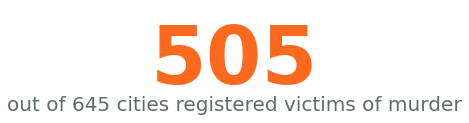

In [11]:
# checking the number of cities with victims of murder

print(f"Number of cities in São Paulo's State with victims of murder: {df.city.unique().shape[0]}")

# making the text

make_text(1,
          1,
          1,
          df.city.unique().shape[0],
          'out of 645 cities registered victims of murder')

### State of São Paulo

As seen above, in São Paulo, 505 cities registered victims of murder in the analyzed period. When we check the amount of victims, we get a total of 11,793 victims of murder.

An analysis year by year shows that the numbers have been falling over the last three years, with a drop of 3.65% in 2019 and a drop of 4.03% in 2020, resulting in a decrease of 7.52% of the number of victims of murder. 

Total number of victims of murder:	 11793
        year
2018    nan%
2019  -3.65%
2020  -4.02%
----------
Total change in the number of victims in the period -7.52%


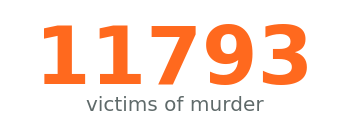

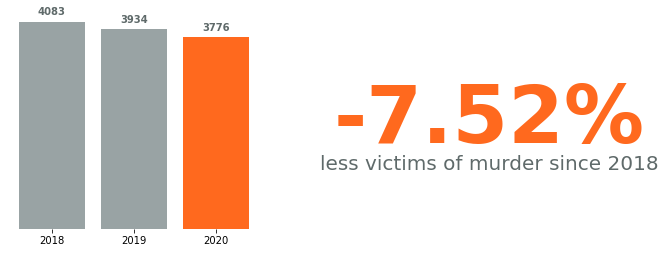

In [12]:
# checking the total number of victims of murder

print(f'Total number of victims of murder:\t {df.shape[0]}')

# making the text

make_text(1,
          1,
          1,
          df.shape[0],
          'victims of murder')

# checking the change in victims of murder per year and the total change

print((round(((df.year.value_counts().diff()) / df.year.value_counts().shift())*100, 2)).to_frame().astype(str) + '%')
print('----------')
print('Total change in the number of victims in the period ' + str(round(((df.year.value_counts().values[2] - df.year.value_counts().values[0]) / df.year.value_counts().values[0])*100,2))+'%')
year_change = (str(round(((df.year.value_counts().values[2] - df.year.value_counts().values[0]) / df.year.value_counts().values[0])*100,2)) + '%')

# making the chart and the text

aux_year = df.year.value_counts().to_frame('Total of Victims')
label_year = aux_year['Total of Victims']
information_year = 'less victims of murder since 2018'

make_chart_and_text(aux_year,
                    aux_year['Total of Victims'],
                    'Total of Victims',
                    year_change,
                    information_year,
                    min_max = '',
                    min_max_all = 'min',
                    a = 0.7,
                    b = 0.5,
                    c = 0.7,
                    d = 0.3)

### Administrative Regions of São Paulo

Above, I carried out an analysis of the numbers throughout the whole state of São Paulo. However, according to police reports of the Secretary of Public Security of the State of São Paulo, São Paulo's state is divided into 12 regions.

Now that we know all the administrative regions in São Paulo's state, it is possible to see a big difference in these regions' total number of victims. This difference occurs because some regions are much more populous than others.

The image on the left side shows the difference between the total numbers of the Capital region and the Presidente Prudente region. However, the Capital region has approximately 12 million inhabitants, whereas the Presidente Prudente region has around 860 thousand inhabitants.

For this reason, in the analysis by region, an analysis of the percentage value will show us much more relevant information than an analysis of the total values by region.

In the percentage results, we noticed three regions (Piracicaba, Bauru, and Araçatuba) where the number of victims of murder has increased in recent years. In contrast, in the other regions, the number of victims has fallen. The regions with the most significant declines are Presidente Prudente, São José do Rio Preto and Santos.

In [13]:
# regions of são paulo state

df.region.sort_values(ascending = True).unique()

array(['Araçatuba', 'Bauru', 'Campinas', 'Capital', 'Grande São Paulo ',
       'Piracicaba', 'Presidente Prudente', 'Ribeirão Preto', 'Santos',
       'Sorocaba', 'São José do Rio Preto', 'São José dos Campos'],
      dtype=object)

In [14]:
# regions with the max and min total number of victims

df_region = df.region.value_counts().to_frame()
df_region.columns = ['Total Number of Victims']
df_region.iloc[[0,-1]]

,Total Number of Victims
Capital,3156
Presidente Prudente,188


In [15]:
# change in the number of victims per year per region

df_region_year = df_region

for year in df.year.unique():
    df_region_year[year] = df.groupby('region')['year'].apply(lambda x:\
                                     (x == year).sum())

df_region_year = df_region_year.drop(columns = ['Total Number of Victims'])
df_region_year

,2018,2019,2020
Capital,1091,1031,1034
Grande São Paulo,871,773,847
São José dos Campos,394,385,375
Campinas,326,353,273
Piracicaba,270,258,279
Ribeirão Preto,274,277,219
Sorocaba,247,252,217
Santos,248,250,197
Bauru,118,116,124
São José do Rio Preto,108,99,85


In [16]:
# percentange chance in the number of victims per year and region

df_regions_change_year = df_region_year.T
df_regions_change_year = (round(df_regions_change_year.pct_change(), 4) * 100).T
df_regions_change_year

,2018,2019,2020
Capital,NaN,-5.50,0.29
Grande São Paulo,NaN,-11.25,9.57
São José dos Campos,NaN,-2.28,-2.60
Campinas,NaN,8.28,-22.66
Piracicaba,NaN,-4.44,8.14
Ribeirão Preto,NaN,1.09,-20.94
Sorocaba,NaN,2.02,-13.89
Santos,NaN,0.81,-21.20
Bauru,NaN,-1.69,6.90
São José do Rio Preto,NaN,-8.33,-14.14


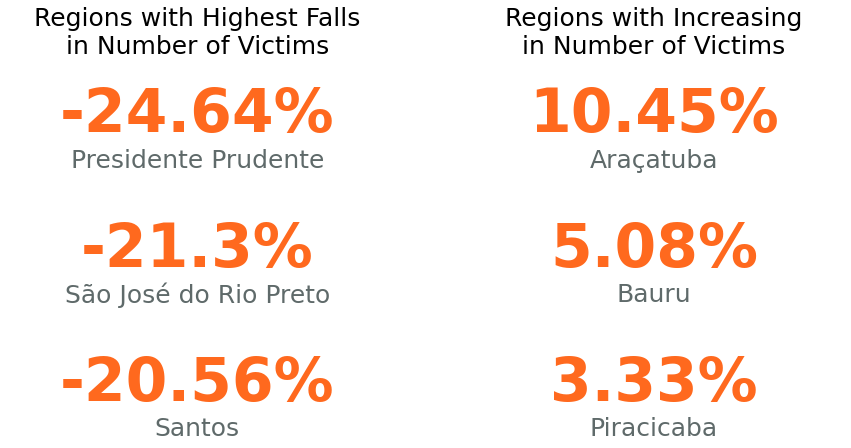

In [17]:
# total change per region

df_region_total_change = df_region_year.copy()
df_region_total_change['Total Change'] = round(((df_region_total_change[2020] - df_region_total_change[2018]) / df_region_total_change[2018]) * 100, 2)
df_region_total_change.drop(columns = [2018, 2019, 2020], inplace = True)
df_region_total_change = df_region_total_change.sort_values('Total Change', ascending = True).astype(str)
df_region_total_change['Total Change'] = df_region_total_change['Total Change'] + '%'
df_region_total_change

# creating texts

title1 = 'Regions with Highest Falls\nin Number of Victims'
title2 = 'Regions with Increasing\nin Number of Victims'
max_min_values_region_total_change = [0, -1, 1, -2, 2, -3]
result_region = []
label_region = []
for value in max_min_values_region_total_change:
    result_region.append(df_region_total_change['Total Change'][value])
    label_region.append(df_region_total_change.index[value]) 

make_text(3,
          2,
          6,
          result_region,
          label = label_region,
          font1_size = 60,
          font2_size = 25,
          title1 = title1,
          title2 = title2,
          font_title = 25,
          figsize = (15,7))

## Social Analysis

Before carrying out an analysis based on social aspects, it is essential to understand how the São Paulo state's population is composed. Usually, in Brazil, a census is carried out every ten years, and the last census was carried out only in 2010 due to the COVID-19 pandemic. Thus, the numbers referring to population gender, ethnicity, and age grouping are unofficial projections.

### Gender

According to SEADE, in 2020, São Paulo's population was 44,639,899 inhabitants, 48.67% men and 51.33% women.

During the period analysed, we can see that 10,388 victims of homicide are male, and 1,405 victims are female in São Paulo's state.

Through the total numbers of victims by gender, it is possible to see that even though the percentage of the female population in São Paulo is higher than the male population, there is a big difference in the number of victims of homicide in the state, with 88% of male victims and 11% of female victims.

However, to understand better the evolution in the number of victims per gender, I analyzed the number of victims per year. The analysis showed that the number of victims from both genders has been falling year after year. At the end of the period, the number of female victims showed a significant drop of 15.98% against a drop of 6.92% of the number of male victims.

Total Number of Male Victims:	 10388
Total Number of Female Victims:	 1405


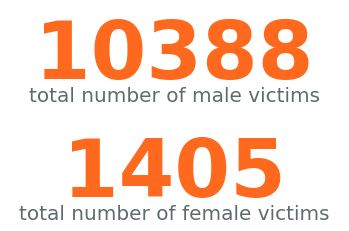

In [46]:
# checking the total number of victims by gender

df_gender = df.gender.value_counts().to_frame()

print(f'Total Number of Male Victims:\t {df_gender.iat[0, 0]}')
print(f'Total Number of Female Victims:\t {df_gender.iat[1, 0]}')

# creating the text

result_gender = [df_gender.iat[0, 0], df_gender.iat[1, 0]]
label_gender = ['total number of male victims', 'total number of female victims']
make_text(2,
          1,
          2,
          result_gender,
          label_gender,
          figsize = (6,4))

In [19]:
# checking the percentage of victims by gender

print(f'Percentage of male victims:\t {str(round((df_gender.iat[0, 0] / df.shape[0])*100, 2))}' + '%')
print(f'Percentage of female victims:\t {str(round((df_gender.iat[1, 0] / df.shape[0])*100, 2))}' + '%')

Percentage of male victims:	 88.09%
Percentage of female victims:	 11.91%


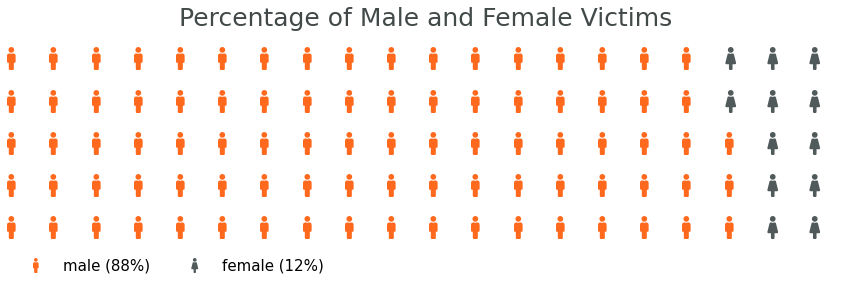

In [20]:
# creating waffle chart for victims

data = {'male':round((df_gender.iat[0, 0] / df.shape[0])*100, 2),
       'female':round((df_gender.iat[1, 0] / df.shape[0])*100, 2)}
font_title = {'family': 'sans-serif', 'color':'#424949','weight': 'normal','size': 25}

fig = plt.figure(
      FigureClass = Waffle,
      rows = 5,
      columns = 20,
      colors = ('#FF691E', '#515A5A'),
      values = data, icons = ['male', 'female'], icon_size = 23,
      title = {'label':'Percentage of Male and Female Victims',
               'loc': 'center', 'fontdict':font_title},
      labels = [f"{k} ({round(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
      legend = {        
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.25),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 15
    },
      icon_legend = True,
      figsize=(15,6)
)
fig.set_tight_layout(False)
plt.show();

In [21]:
# checking the total number of victims per year by gender

df_gender_year = df_gender.copy()

for year in df.year.unique():
    df_gender_year[year] = df.groupby('gender')['year'].apply(lambda x: \
                               (x == year).sum())

df_gender_year = df_gender_year.drop(columns = ['gender'])
df_gender_year

,2018,2019,2020
male,3576,3462,3350
female,507,472,426


In [22]:
# checking the change by year

df_gender_change_year = df_gender_year.T
df_gender_change_year = (round(df_gender_change_year.pct_change(),4)*100).T
df_gender_change_year

,2018,2019,2020
male,NaN,-3.19,-3.24
female,NaN,-6.90,-9.75


In [23]:
# checking the total change by gender

df_gender_total_change = df_gender_year.copy()
df_gender_total_change['Total Change'] = round(((df_gender_total_change[2020] - df_gender_total_change[2018]) / df_gender_total_change[2018]) * 100, 2)
df_gender_total_change.drop(columns = [2018, 2019, 2020], inplace = True)
df_gender_total_change['Total Change'].sort_values(ascending = True).to_frame()
df_gender_total_change = df_gender_total_change.sort_values('Total Change', ascending = True).astype(str)
df_gender_total_change['Total Change'] = df_gender_total_change['Total Change'] + '%'
df_gender_total_change

,Total Change
female,-15.98%
male,-6.32%


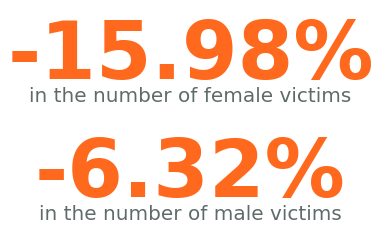

In [24]:
# making the text

result_gender = [df_gender_total_change['Total Change'][0], df_gender_total_change['Total Change'][1]] 
label_gender = ['in the number of female victims', 'in the number of male victims']
title = 'Total Change in Victims per Gender'

make_text(2,
          1,
          2,
          result_gender,
          label_gender,
          figsize = (6,4))

### Etinia

Brazil is a multiracial country, and in its census, the population is divided into five ethnic groups: Asian, Black, Indigenous, Parda (Multiracial), and White. According to SEADE, in 2010, the population of the state of São Paulo was divided as follows:

|Ethnicity| % |
|---|---|
|Asian|1.35%|
|Black|5.53%|
|Indigenous|0.1%|
|Parda (multiracial)|29.11%|
|White|63.91%|

**Note: some victims of homicide did not have their ethnic group disclosed in the police report. For these occurrences, the police station's system automatically noted for these victims "no information".**

After analyzing the total number of victims by ethnicity, we see that more than 87% of the cases are composed of parda(multiracial) and white victims, with 5216 victims and 5096 victims, respectively. Right after that, we have 991 black victims, 463 victims without information on their ethnicity, 23 Asian victims, and four indigenous victims. 

Analyzing São Paulo's population, we can see that the multiracial population is approximately half of the white population. Considering the number of victims of homicide by ethnicity, it is possible to see the inequality. Multiracial victims represent most victims in São Paulo's state, with 44.23% against 43.21% being white victims and 8.4% of black victims. After a study on the difference between the numbers per year, it was found that the number of white victims fell by 9.31%, followed by multiracial victims, 8.24%, and black victims, 6.73%.

In [47]:
# checking the total number of victims by gender

df_ethnicity = df.ethnicity.value_counts().to_frame()
for ethnicity in df.ethnicity.unique():
    if ethnicity == 'parda (multiracial)':
        print(f'Total Number of {ethnicity} victims:\t{df_ethnicity.loc[ethnicity][0]}')
    elif ethnicity == 'no information' or ethnicity == 'indigenous':
        print(f'Total Number of {ethnicity} victims:\t\t{df_ethnicity.loc[ethnicity][0]}')
    else:        
        print(f'Total Number of {ethnicity} victims:\t\t\t{df_ethnicity.loc[ethnicity][0]}')

Total Number of parda (multiracial) victims:	5216
Total Number of white victims:			5096
Total Number of black victims:			991
Total Number of no information victims:		463
Total Number of asian victims:			23
Total Number of indigenous victims:		4


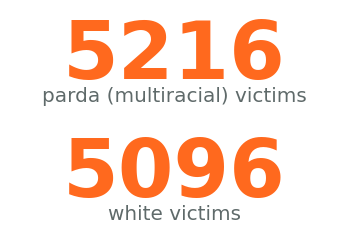

In [26]:
# making the text

result_ethnicity = [df_ethnicity['ethnicity'][0],df_ethnicity['ethnicity'][1]]
label_ethnicity = [df_ethnicity.index[0] + ' victims', df_ethnicity.index[1] + ' victims']

make_text(2,
          1,
          2,
          result_ethnicity,
          label_ethnicity,
          figsize = (6,4))

In [48]:
# checking the percentage of victims by ethnicity

for ethnicity in df.ethnicity.unique():
    if ethnicity == 'parda (multiracial)':
        print(f'Percentage of {ethnicity} victims:\t{str(round((df_ethnicity.loc[ethnicity][0] / df.shape[0])*100, 2))}' + '%')
    elif ethnicity == 'no information' or ethnicity == 'indigenous':
        print(f'Percentage of {ethnicity} victims:\t\t{str(round((df_ethnicity.loc[ethnicity][0] / df.shape[0])*100, 2))}' + '%')
    else:        
        print(f'Percentage of {ethnicity} victims:\t\t\t{str(round((df_ethnicity.loc[ethnicity][0] / df.shape[0])*100, 2))}' + '%')

Percentage of parda (multiracial) victims:	44.23%
Percentage of white victims:			43.21%
Percentage of black victims:			8.4%
Percentage of no information victims:		3.93%
Percentage of asian victims:			0.2%
Percentage of indigenous victims:		0.03%


In [28]:
# checking the total number of victims per ethnicity by year

df_ethnicity_year = df_ethnicity.copy()

for year in df.year.unique():
    df_ethnicity_year[year] = df.groupby('ethnicity')['year'].apply(lambda x: \
                               (x == year).sum())

df_ethnicity_year = df_ethnicity_year.drop(columns = ['ethnicity'])
df_ethnicity_year

,2018,2019,2020
parda (multiracial),1820,1726,1670
white,1772,1717,1607
black,342,330,319
no information,145,149,169
asian,4,11,8
indigenous,0,1,3


In [29]:
# checking the change by year

df_ethnicity_change_year = df_ethnicity_year.T
df_ethnicity_change_year = (round(df_ethnicity_change_year.pct_change(),4)*100).T
df_ethnicity_change_year

,2018,2019,2020
parda (multiracial),NaN,-5.16,-3.24
white,NaN,-3.10,-6.41
black,NaN,-3.51,-3.33
no information,NaN,2.76,13.42
asian,NaN,175.00,-27.27
indigenous,NaN,inf,200.00


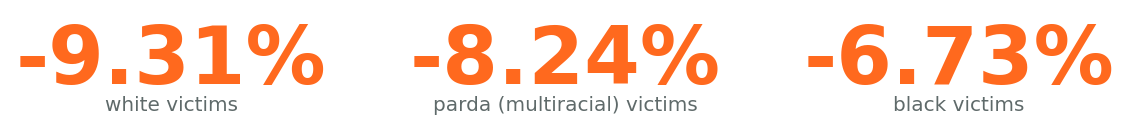

In [30]:
# checking the total change by ethnicity

df_ethnicity_total_change = df_ethnicity_year.copy()
df_ethnicity_total_change['Total Change'] = round(((df_ethnicity_total_change[2020] - df_ethnicity_total_change[2018]) / df_ethnicity_total_change[2018]) * 100, 2)
df_ethnicity_total_change.drop(columns = [2018, 2019, 2020], inplace = True)
df_ethnicity_total_change['Total Change'].sort_values(ascending = True).to_frame()
df_ethnicity_total_change = df_ethnicity_total_change.sort_values('Total Change', ascending = True).astype(str)
df_ethnicity_total_change['Total Change'] = df_ethnicity_total_change['Total Change'] + '%'
df_ethnicity_total_change

# creating the texts

result_ethnicity = [df_ethnicity_total_change['Total Change'][0], df_ethnicity_total_change['Total Change'][1], df_ethnicity_total_change['Total Change'][2]]
label_ethnicity = [df_ethnicity_total_change.index[0] + ' victims', df_ethnicity_total_change.index[1] + ' victims', df_ethnicity_total_change.index[2] + ' victims']
make_text(1,
          3,
          3,
          result_ethnicity,
          label_ethnicity,
          figsize = (20,2))

### Age

In the police reports, the age of many of the victims was not indicated. In the case of these victims, the age of 200 years was added, so that they were included in the „unknown“ age group. When the statistical summary is generated, these victims are not selected.

The statistics summary shows that the average age of the victims and the median are respectively 33.77 years and 32 years. 25% of the victims are below 23 years old, and 75% are below 41 years old. This information already shows that most victims are concentrated on the age group 20-29 and are concentrated up to 30-39, as shown below.

After the total results, I conducted a study to verify the differences per year, where all age groups showed a drop in values. However, age groups 10-19 with -34.23%, 0-9 with -25.00%, and 70+ with -20.00% showed the most significant decrease in the number of victims.

In [31]:
# checking the statistics summary of age variable

df_age = df.age
df_age.to_frame()
summary = df_age.replace(200, np.NaN).to_frame()
summary.describe()

,age
count,9762.000000
mean,33.779553
std,13.433729
min,0.000000
25%,23.000000
50%,32.000000
75%,41.000000
max,99.000000


In [32]:
# checking the total number of victims by age_group

df_agegroup = df.age_group.value_counts().to_frame().sort_index()
age_group = df.age_group.unique().sort_values()

for agegroup in age_group:
    if agegroup != 'unknown':
        print(f'Total Number of victims in the age group {agegroup}:\t\t{df_agegroup.loc[agegroup][0]}')
    else:        
        print(f'Total Number of victims in the age group {agegroup}:\t{df_agegroup.loc[agegroup][0]}')

Total Number of victims in the age group 0-9:		74
Total Number of victims in the age group 10-19:		1152
Total Number of victims in the age group 20-29:		2995
Total Number of victims in the age group 30-39:		2677
Total Number of victims in the age group 40-49:		1626
Total Number of victims in the age group 50-59:		767
Total Number of victims in the age group 60-69:		325
Total Number of victims in the age group 70+:		146
Total Number of victims in the age group unknown:	2031


In [33]:
# checking the percentage of victims by age_group

for agegroup in age_group:
    print(f'Percentage of victims in the {agegroup} age group:\t\t{str(round((df_agegroup.loc[agegroup][0] / df.shape[0])*100, 2))}' + '%')

Percentage of victims in the 0-9 age group:		0.63%
Percentage of victims in the 10-19 age group:		9.77%
Percentage of victims in the 20-29 age group:		25.4%
Percentage of victims in the 30-39 age group:		22.7%
Percentage of victims in the 40-49 age group:		13.79%
Percentage of victims in the 50-59 age group:		6.5%
Percentage of victims in the 60-69 age group:		2.76%
Percentage of victims in the 70+ age group:		1.24%
Percentage of victims in the unknown age group:		17.22%


In [34]:
# checking the total number of victims per age_group by year

df_agegroup_year = df_agegroup.copy()

for year in df.year.unique():
    df_agegroup_year[year] = df.groupby('age_group')['year'].apply(lambda x: \
                               (x == year).sum())

df_agegroup_year = df_agegroup_year.drop(columns = ['age_group'])
df_agegroup_year

,2018,2019,2020
0-9,24,32,18
10-19,485,348,319
20-29,1035,1043,917
30-39,902,928,847
40-49,570,523,533
50-59,266,240,261
60-69,108,113,104
70+,50,56,40
unknown,643,651,737


In [35]:
# checking the change by year

df_agegroup_change_year = df_agegroup_year.T
df_agegroup_change_year = (round(df_agegroup_change_year.pct_change(),4)*100).T
df_agegroup_change_year

,2018,2019,2020
0-9,NaN,33.33,-43.75
10-19,NaN,-28.25,-8.33
20-29,NaN,0.77,-12.08
30-39,NaN,2.88,-8.73
40-49,NaN,-8.25,1.91
50-59,NaN,-9.77,8.75
60-69,NaN,4.63,-7.96
70+,NaN,12.00,-28.57
unknown,NaN,1.24,13.21


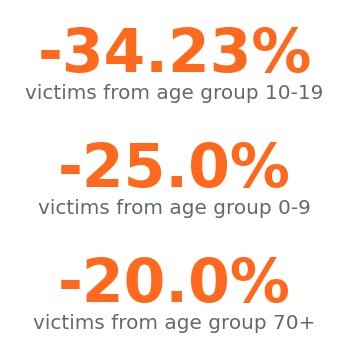

In [36]:
# checking the total change by age_group

df_agegroup_total_change = df_agegroup_year.copy()
df_agegroup_total_change['Total Change'] = round(((df_agegroup_total_change[2020] - df_agegroup_total_change[2018]) / df_agegroup_total_change[2018]) * 100, 2)
df_agegroup_total_change.drop(columns = [2018, 2019, 2020], inplace = True)
df_agegroup_total_change['Total Change'].sort_values(ascending = True).to_frame()
df_agegroup_total_change = df_agegroup_total_change.sort_values('Total Change', ascending = True).astype(str)
df_agegroup_total_change['Total Change'] = df_agegroup_total_change['Total Change'] + '%'

# creating the text for age_group

result_agegroup = [df_agegroup_total_change['Total Change'][0], df_agegroup_total_change['Total Change'][1], df_agegroup_total_change['Total Change'][2]]
label_agegroup = ['victims from age group ' + df_agegroup_total_change.index[0], 'victims from age group ' + df_agegroup_total_change.index[1], 'victims from age group ' + df_agegroup_total_change.index[2]]
make_text(3,
          1,
          3,
          result_agegroup,
          label_agegroup,
          font1_size = 60,
          figsize = (6,6))

### Victims Profile

After analyzing the variables `gender`, `ethnicity`, `age`, and `age_group`, we can trace a profile of the most frequent victims of homicide. The male victims' profile shows that most male victims were multiracial and aged between 20-29 years. This profile showed a total of 1285 victims in the analyzed period.

A female profile, on the other hand, has different characteristics. The female victims' profile shows that majority of female victims were white and aged 30-39. This profile showed a total of 174 victims in the analyzed period.

In [37]:
# victims profile for male gender

df_male = df[df['gender'] == 'male']
df_male = df_male.groupby(['gender', 'ethnicity', 'age_group']).size().to_frame().reset_index()
df_male.columns = ['gender','ethnicity', 'age_group', 'total victims']
df_male = df_male.sort_values('total victims', ascending = False).reset_index()
df_male = df_male.drop('index', axis = 1)
df_male.head(3)

,gender,ethnicity,age_group,total victims
0,male,parda (multiracial),20-29,1285
1,male,white,20-29,1080
2,male,parda (multiracial),30-39,1065


In [38]:
# victims profile for female gender

df_female = df[df['gender'] == 'female']
df_female = df_female.groupby(['gender','ethnicity', 'age_group']).size().to_frame().reset_index()
df_female.columns = ['gender', 'ethnicity', 'age_group', 'total victims']
df_female = df_female.sort_values('total victims', ascending = False).reset_index()
df_female = df_female.drop('index', axis = 1)
df_female.head(3)

,gender,ethnicity,age_group,total victims
0,female,white,30-39,174
1,female,white,20-29,161
2,female,white,40-49,139


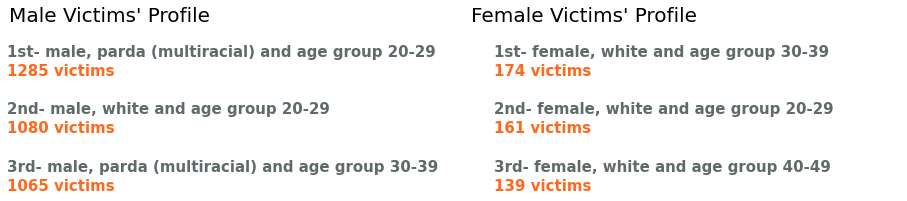

In [39]:
# creating victims' profile text

values_victims_profile = [0, 1, 2]
result_victims_profile = []
label_victims_profile = []
abb = ['st', 'nd', 'rd']

for i in values_victims_profile:
    label_victims_profile.append(f'{df_male["total victims"][i]} victims')
    label_victims_profile.append(f'{df_female["total victims"][i]} victims')
    result_victims_profile.append(f'{i+1}{abb[i]}- {df_male.iat[i,0]}, {df_male.iat[i,1]} and age group {df_male.iat[i,2]}')
    result_victims_profile.append(f'{i+1}{abb[i]}- {df_female.iat[i,0]}, {df_female.iat[i,1]} and age group {df_female.iat[i,2]}')

#for i in values_victims_profile:
#    result_victims_profile.append(df_female['total victims'][i])
#    label_victims_profile.append(f'gender {df_female.iat[i,0]}, {df_female.iat[i,1]} and age between {df_female.iat[i,2]} years old')

make_text(3,
          2,
          6,
          result_victims_profile,
          label = label_victims_profile,
          font1_size = 15,
          font2_size = 15,
          ha = 'left',
          font1_color = '#5F6A6A',
          font2_color = '#FF691E',
          font1_weight = 'heavy',
          font2_weight = 'bold',
          title1 = "Male Victims' Profile",
          title2 = "Female Victims' Profile",
          loc = 'right',
          a = 0,
          c = 0,
          figsize = (16, 3))

## Temporal Analysis

The temporal analysis will seek to obtain simple information on the total number of victims per period.
This analysis will answer the following questions:

1. What is the month with the most victims of murder?
2. What is the day with the most victims of murder?
3. Which period of the day has more victims of murder?
4. What is the hour of the day with the most victims of muder? Are there differences between the hours on weekdays and weekends?

### 1 - What is the month with the most victims of murder?

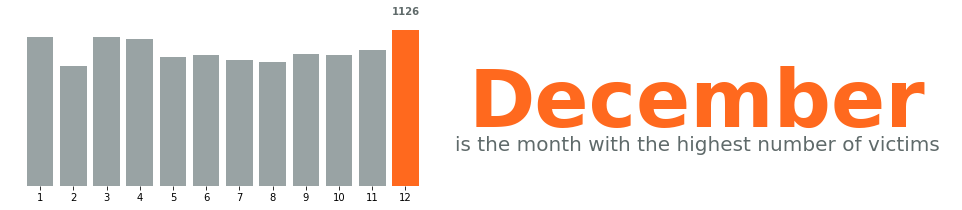

In [40]:
# checking the months with more victims

aux_month = df.groupby('month').size().to_frame()
month_map = {1:'January', 
             2:'February', 
             3:'March', 
             4:'April', 
             5:'Mai', 
             6:'June', 
             7:'July', 
             8:'August', 
             9:'September', 
             10:'October', 
             11:'November', 
             12:'December'}

aux_month["month_map"] = aux_month.index.map(month_map)

result_month = aux_month.loc[aux_month[0].idxmax()]['month_map'] 
label_month = aux_month[0]
text_month = 'is the month with the highest number of victims'

make_chart_and_text(aux_month,
                    label_month,
                    0,
                    result_month,
                    text_month,
                    min_max = 'max',
                    min_max_all = 'max',
                    a = 0.4,
                    b = 0.5,
                    c = 0.4,
                    d = 0.25,
                    figsize = (17,3))

### 2 - What is the day with the most victims of murder?

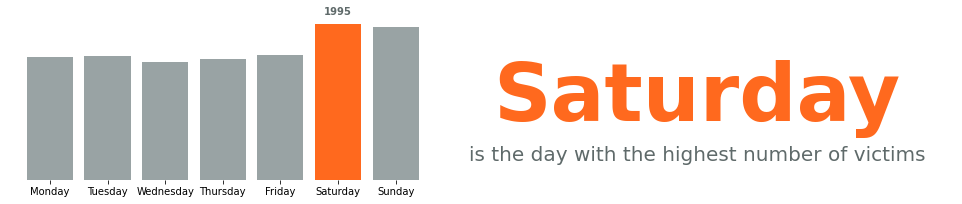

In [41]:
# checking the day the of week with more victims

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories = ['Monday',
                                                                    'Tuesday',
                                                                    'Wednesday',
                                                                    'Thursday',
                                                                    'Friday',
                                                                    'Saturday',
                                                                    'Sunday'], ordered=True)

aux_dayofweek = df.groupby('day_of_week').size().to_frame()
result_dayofweek = aux_dayofweek[0].idxmax()
text_dayofweek = 'is the day with the highest number of victims'

make_chart_and_text(aux_dayofweek,
                    aux_dayofweek[0],
                    0,
                    result_dayofweek,
                    text_dayofweek,
                    min_max = 'max',
                    min_max_all = 'max',
                    a = 0.4,
                    b = 0.5,
                    c = 0.4,
                    d = 0.15,
                    figsize = (17,3))

### 3 - Which period of the day has more victims of murder?

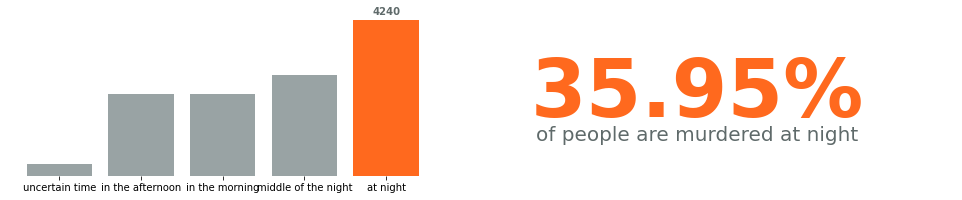

In [42]:
# checking the period of the day of with more victims

aux_period = df.groupby('period').size().sort_values(ascending = True).to_frame()
result_period = str(round(aux_period[0][4] / (aux_period[0].sum()) * 100, 2)) + '%'
text_period = 'of people are murdered at night'

make_chart_and_text(aux_period,
                    aux_period[0],
                    0,
                    result_period,
                    text_period,
                    min_max = 'max',
                    min_max_all = 'max',
                    a = 0.4,
                    b = 0.5,
                    c = 0.4,
                    d = 0.25,
                    figsize = (17,3))

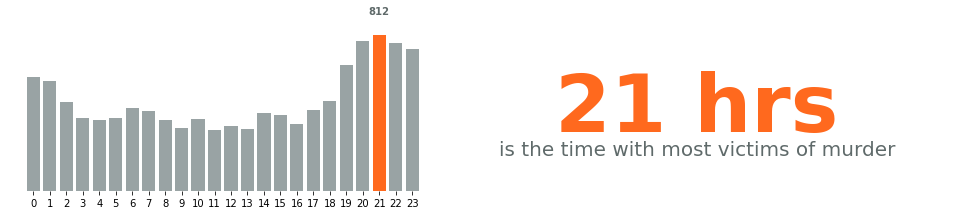

In [43]:
# checking the hour of the day with more victims

df_hour = df[df.period != 'uncertain time']

aux_hour = df_hour.groupby('hour').size().to_frame()
result_hour = str(aux_hour.idxmax(0)[0]) + ' hrs'
text_hour = 'is the time with most victims of murder'
make_chart_and_text(aux_hour,
                    aux_hour[0],
                    0,
                    result_hour,
                    text_hour,
                    min_max = 'max',
                    min_max_all = 'max',
                    a = 0.4,
                    b = 0.5,
                    c = 0.4,
                    d = 0.25,
                    figsize = (17,3))

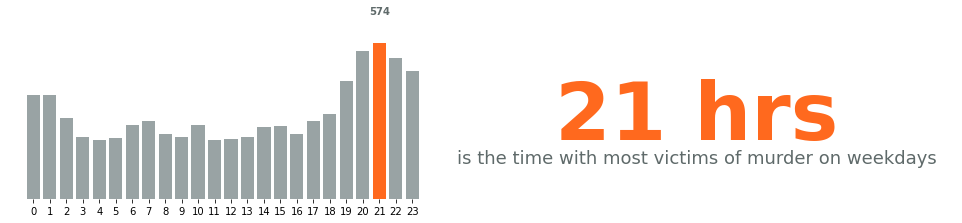

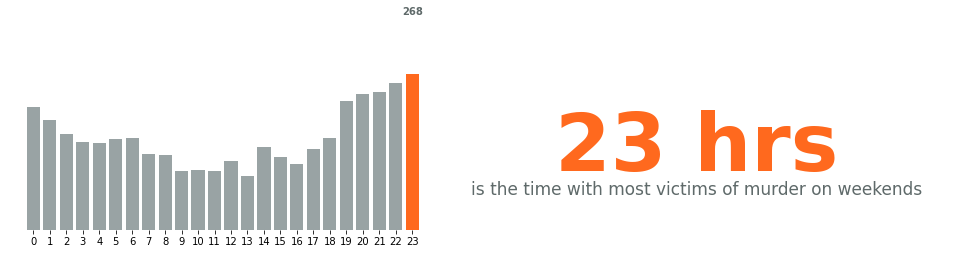

In [44]:
# checking the hour on weekdays with more victims

df_hour_week = df[df.period != 'uncertain time']
df_hour_week = df_hour_week[df_hour_week.weekend != 1]

aux_hour_week = df_hour_week.groupby(['hour', 'weekend']).size().to_frame()
aux_hour_week.index = aux_hour_week.index.droplevel('weekend')
result_hour_week = str(aux_hour_week.idxmax(0)[0]) + ' hrs'
text_hour_week = 'is the time with most victims of murder on weekdays'
make_chart_and_text(aux_hour_week,
                    aux_hour_week[0],
                    0,
                    result_hour_week,
                    text_hour_week,
                    min_max = 'max',
                    min_max_all = 'max',
                    font2_size = 18,
                    a = 0.4,
                    b = 0.5,
                    c = 0.4,
                    d = 0.25,
                    figsize = (17,3))

# checking the hour on weekdays with more victims

df_hour_weekend = df[df.period != 'uncertain time']
df_hour_weekend = df_hour_weekend[df_hour_weekend.weekend != 0]

aux_hour_weekend = df_hour_weekend.groupby(['hour', 'weekend']).size().to_frame()
aux_hour_weekend.index = aux_hour_weekend.index.droplevel('weekend')
result_hour_weekend = str(aux_hour_weekend.idxmax(0)[0]) + ' hrs'
text_hour_weekend = 'is the time with most victims of murder on weekends'
make_chart_and_text(aux_hour_weekend,
                    aux_hour_weekend[0],
                    0,
                    result_hour_weekend,
                    text_hour_weekend,
                    min_max = 'max',
                    min_max_all = 'max',
                    font2_size = 17,
                    a = 0.4,
                    b = 0.5,
                    c = 0.4,
                    d = 0.25,
                    figsize = (17,3))

## Conclusion

The analysis obtained exciting information about the murder data in São Paulo's state. Firstly, it was possible to see that the numbers of murders in São Paulo's state have been dropping over the past few years. However, some state regions presented a significant decline in the number of victims, and three out of twelve regions demonstrated increases in their numbers.

It was also possible to observe the big difference in the number of male and female victims and see how the number of female victims is falling significantly more than the male victims. Through gender and other characteristics, it was possible to identify groups, based on a simple victims' profile, that can be more likely to be victims than others.

At the end of the study, it was possible to conclude that December is the month with the highest number of homicide victims, and Saturday is the day that most people are murdered. The period that most murders taking place is at night, and a slight difference in hours could be identified in the murders' data when weekdays and weekends are compared.

As I previously treated the dataset published in this project to protect the victims' identity, the complete dataset presents more information, such as the location within a city where the homicide occurred. Carrying out implementations in this study using the area where these crimes took place with the intent of creating a map of homicides within a given municipality, besides, to compare these data with social indicators of the cities, such as the HDI and others, are the next steps for the continuity of this study.